
<h2>Understanding the data</h2>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('C:/Users/sriva/Desktop/Machine learning!/Projects/Crop_recommendation/Datasets/indiancrop_dataset.csv')

In [3]:
df

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,West Bengal,1000,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,West Bengal,800,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,West Bengal,560,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,West Bengal,1500,Coffee


In [4]:
df2=df #making a copy 

In [5]:
df2['STATE'].value_counts().count() 

26

So data exists for 26 states of India

In [6]:
df2.isnull() #no null values

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False,False,False


In [7]:
df2['CROP'].value_counts()

Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: CROP, dtype: int64

Equally balanced data

<h3>Finding the distribution of crops across every state</h3>

In [8]:
temp=df2.groupby(by='STATE')['CROP'].value_counts()
temp

STATE                CROP       
Andaman and Nicobar  Rice            15
Andhra Pradesh       Rice             7
Assam                Rice            58
Chattisgarh          Rice             5
Goa                  Rice             3
Gujarat              Maize          100
                     Rice            12
                     ChickPea         1
Haryana              ChickPea        65
Himachal Pradesh     KidneyBeans     68
                     ChickPea        34
Jammu and Kashmir    KidneyBeans      3
Karnataka            KidneyBeans     29
                     PigeonPeas       7
Kerala               MothBeans      100
                     PigeonPeas      93
                     MungBean        81
Madhya Pradesh       Blackgram       25
                     MungBean        19
Maharashtra          Lentil          87
                     Blackgram       75
Manipur              Pomegranate     39
                     Lentil          13
Meghalaya            Pomegranate      6
Nagalan

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns



In [10]:
df2.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice


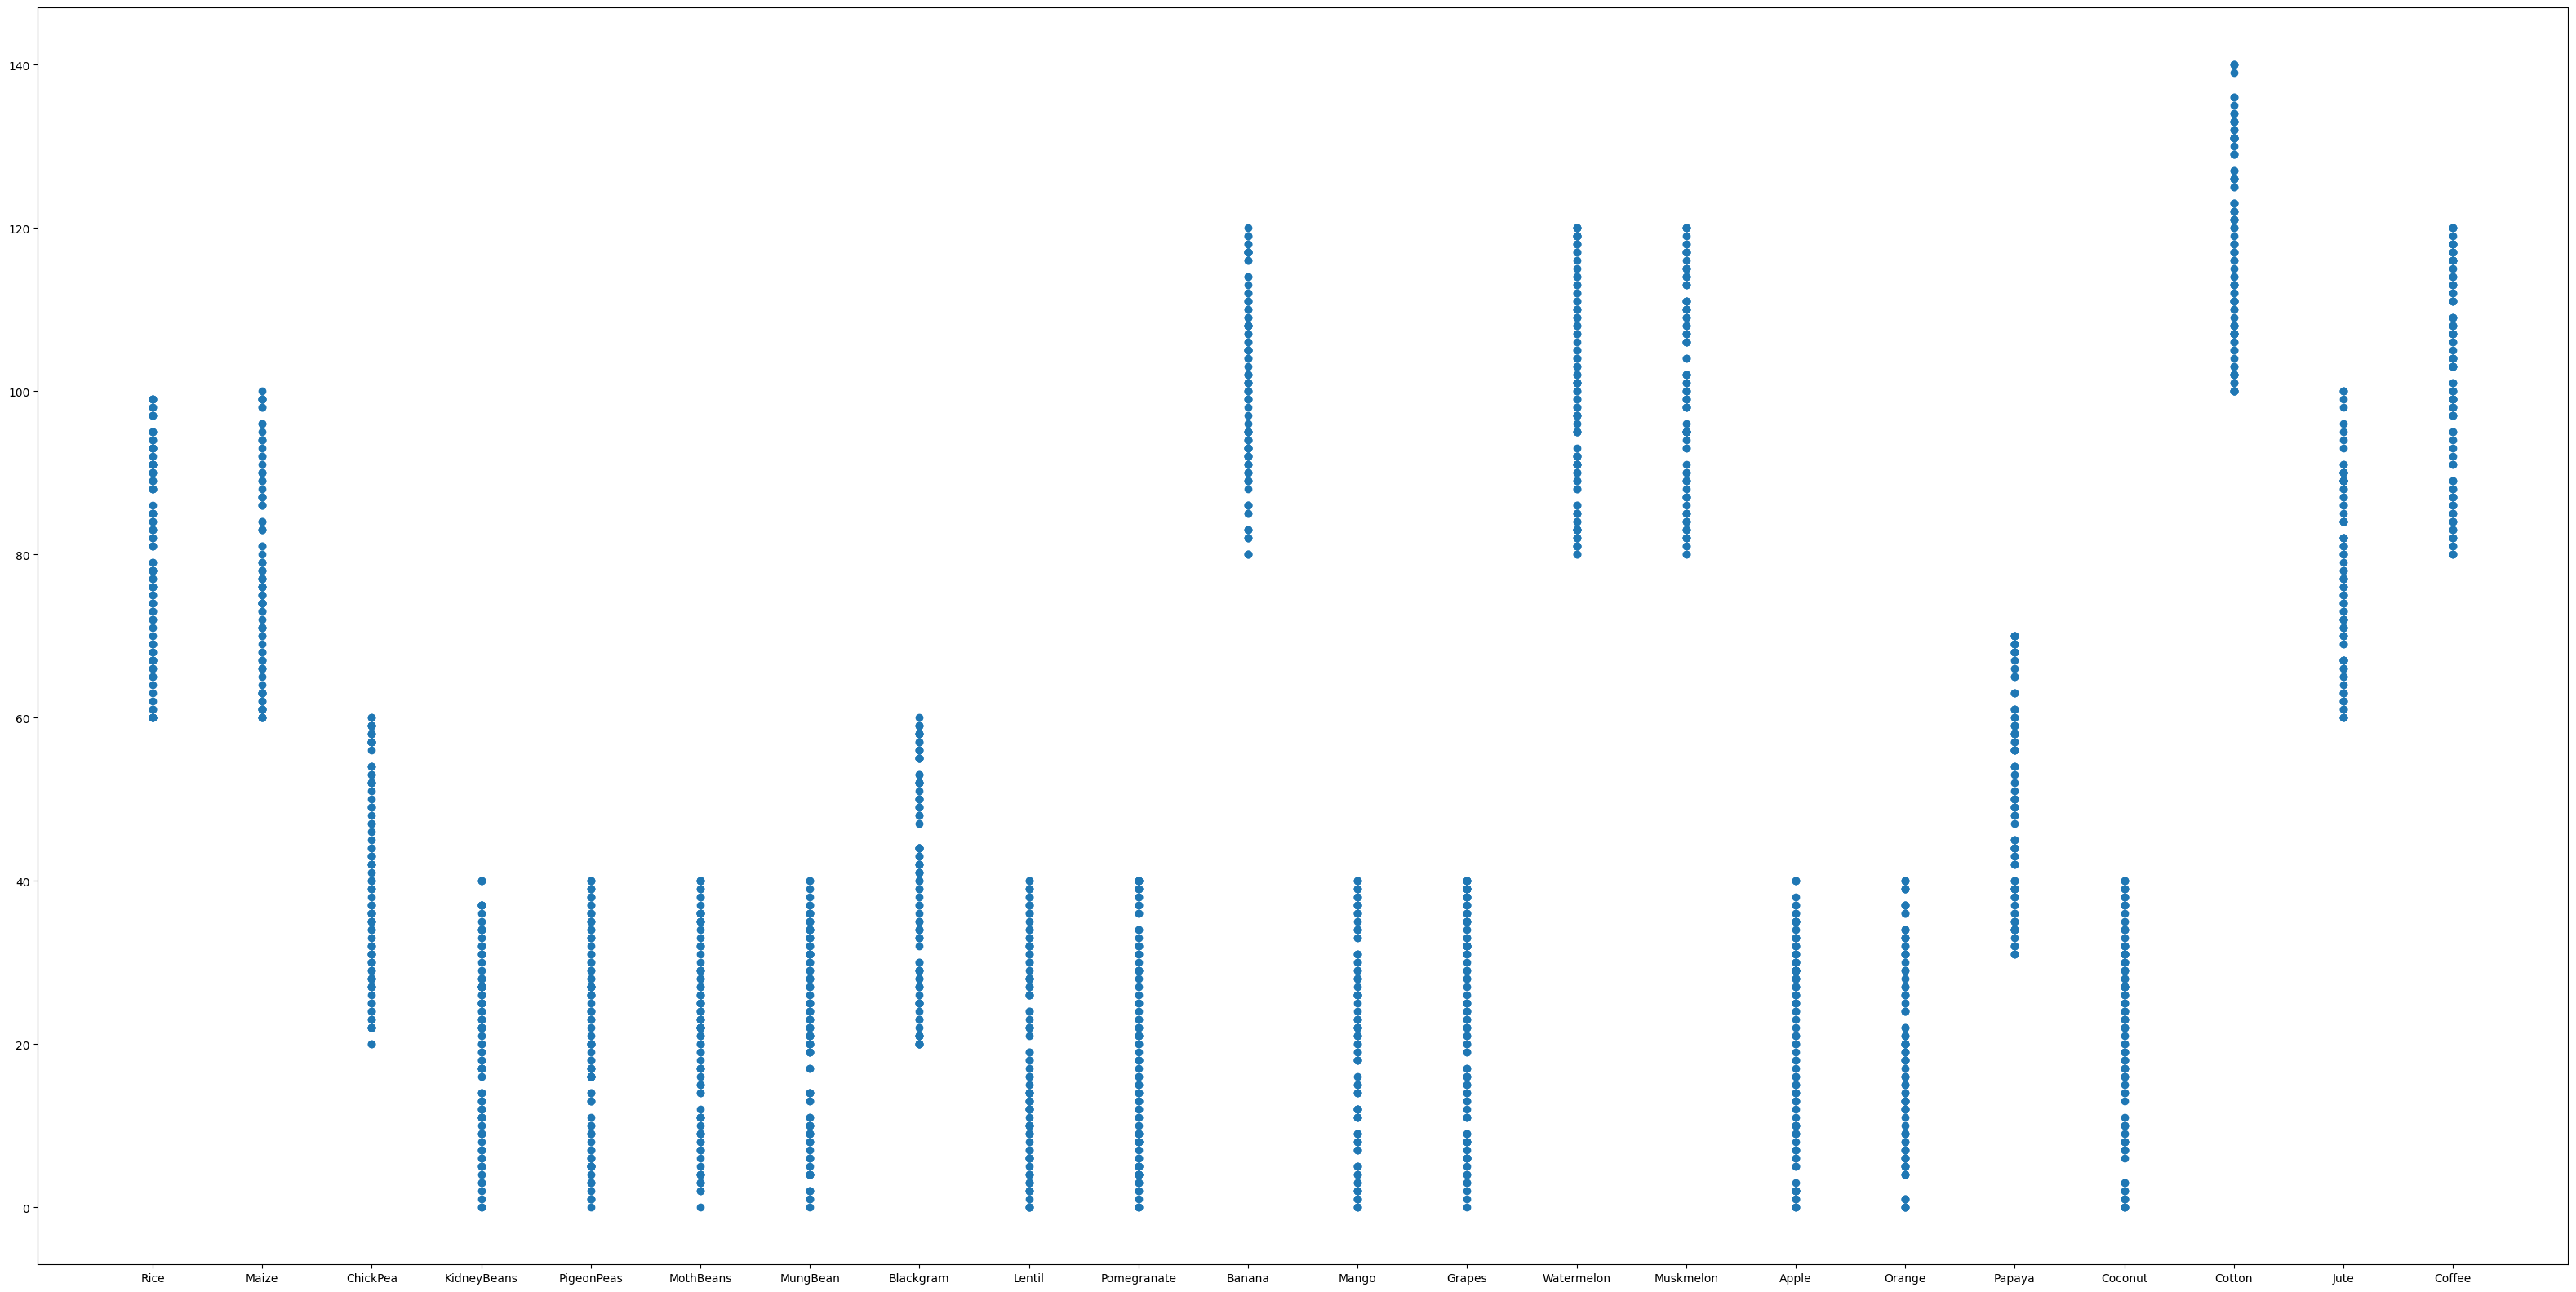

In [11]:
plt.figure(figsize=(40,20))
plt.scatter(df2['CROP'], df2['N_SOIL'], )

In [12]:
df2.corr()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE
N_SOIL,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.001302
P_SOIL,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,-0.023683
K_SOIL,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.021923
TEMPERATURE,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,-0.029044
HUMIDITY,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,-0.041414
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.033548
RAINFALL,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.058847
CROP_PRICE,-0.001302,-0.023683,-0.021923,-0.029044,-0.041414,-0.033548,0.058847,1.000000


There is a strong correlation between P_SOIL and K_SOIL according to the pearson correlation coefficient.

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N_SOIL       2200 non-null   int64  
 1   P_SOIL       2200 non-null   int64  
 2   K_SOIL       2200 non-null   int64  
 3   TEMPERATURE  2200 non-null   float64
 4   HUMIDITY     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   RAINFALL     2200 non-null   float64
 7   STATE        2200 non-null   object 
 8   CROP_PRICE   2200 non-null   int64  
 9   CROP         2200 non-null   object 
dtypes: float64(4), int64(4), object(2)
memory usage: 172.0+ KB


Changing to object type data to 'category'

In [14]:
df2[['CROP','STATE']]=df2[['CROP','STATE']].astype('category')

<h3>Checking for Outliers</h3>

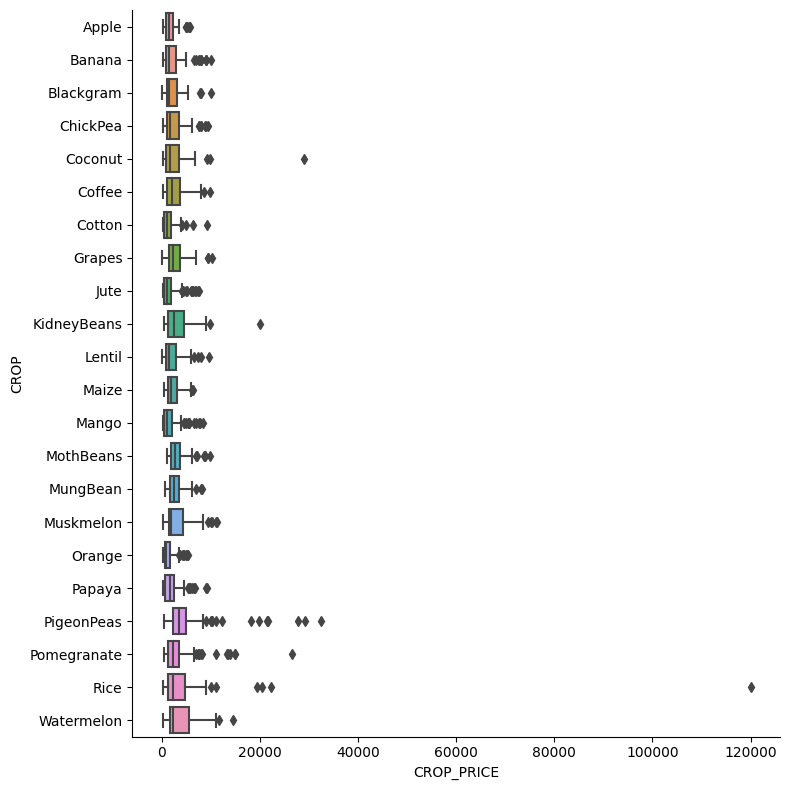

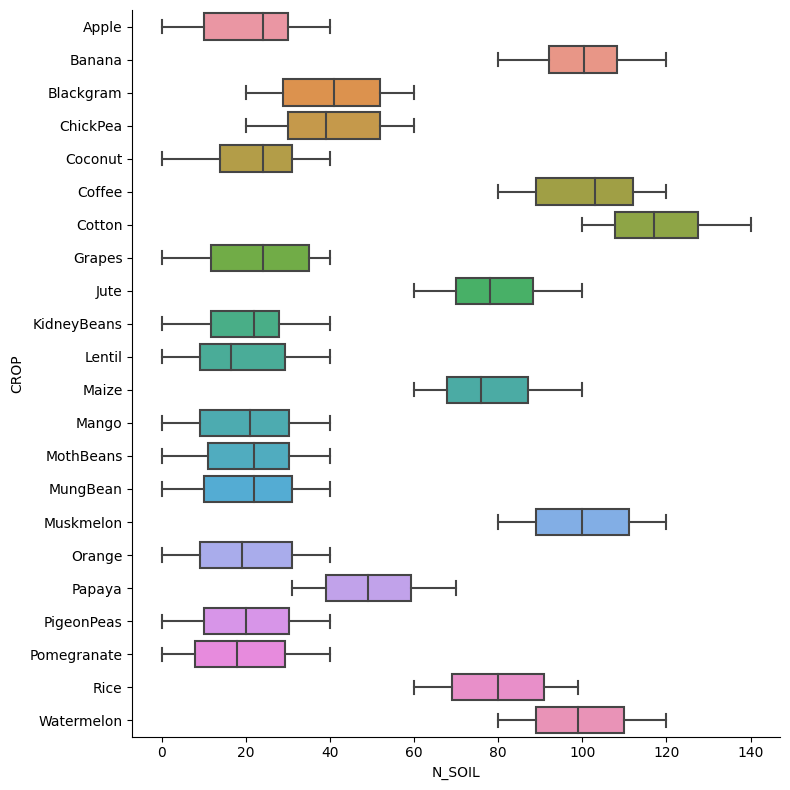

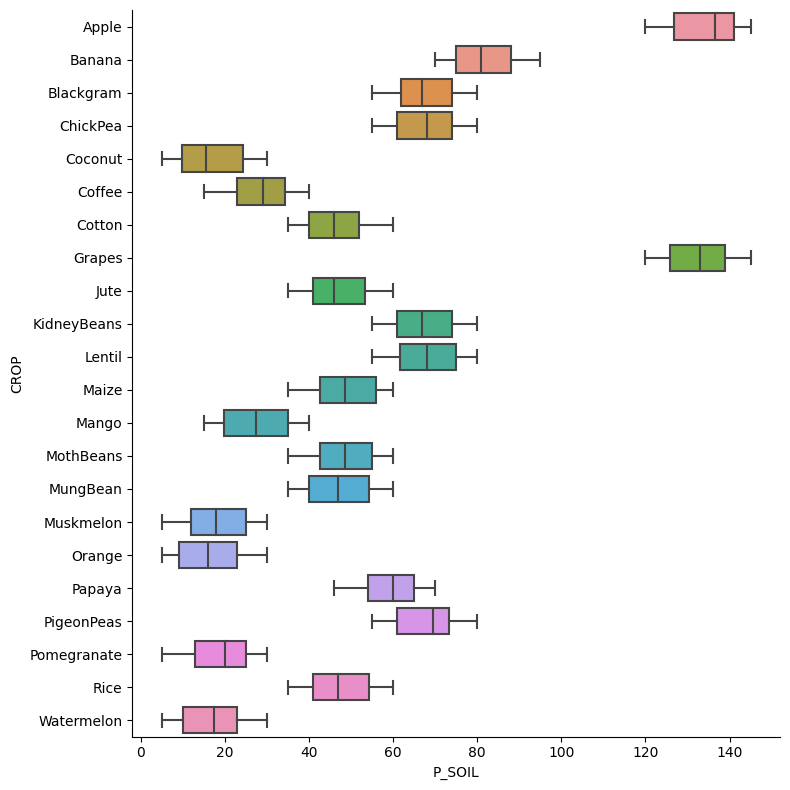

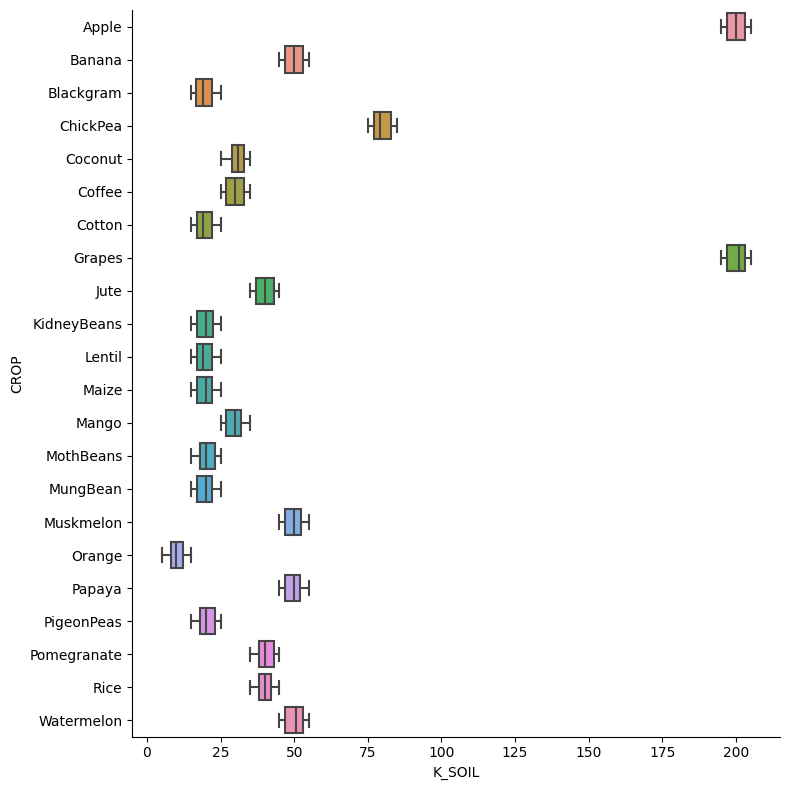

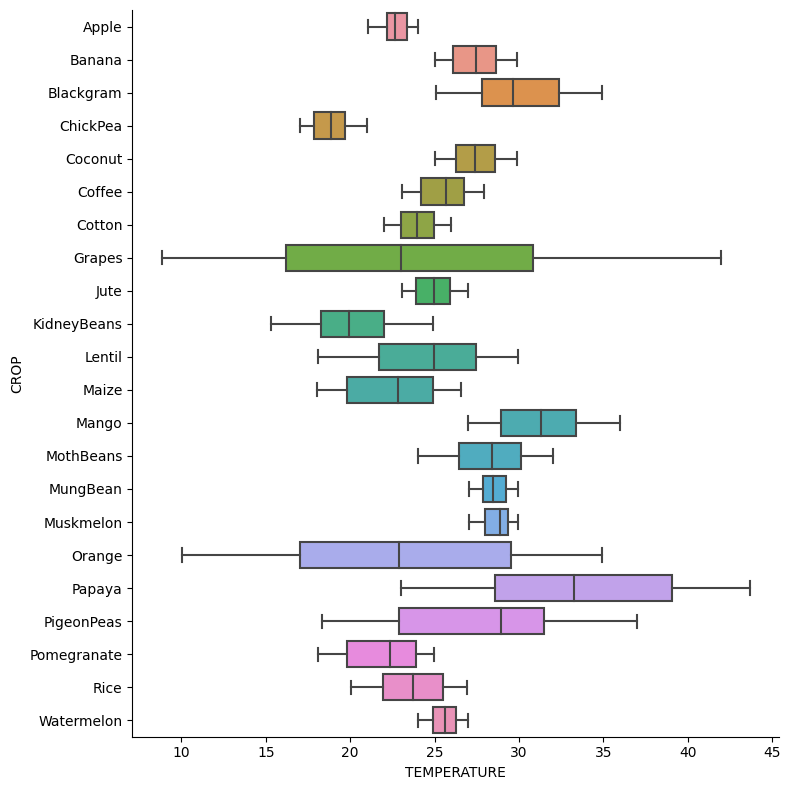

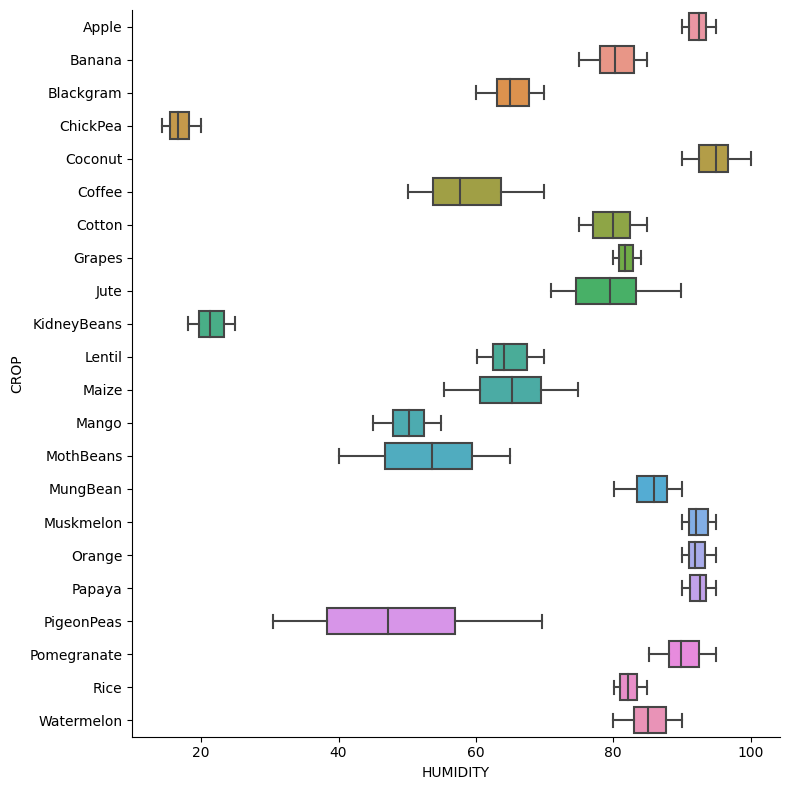

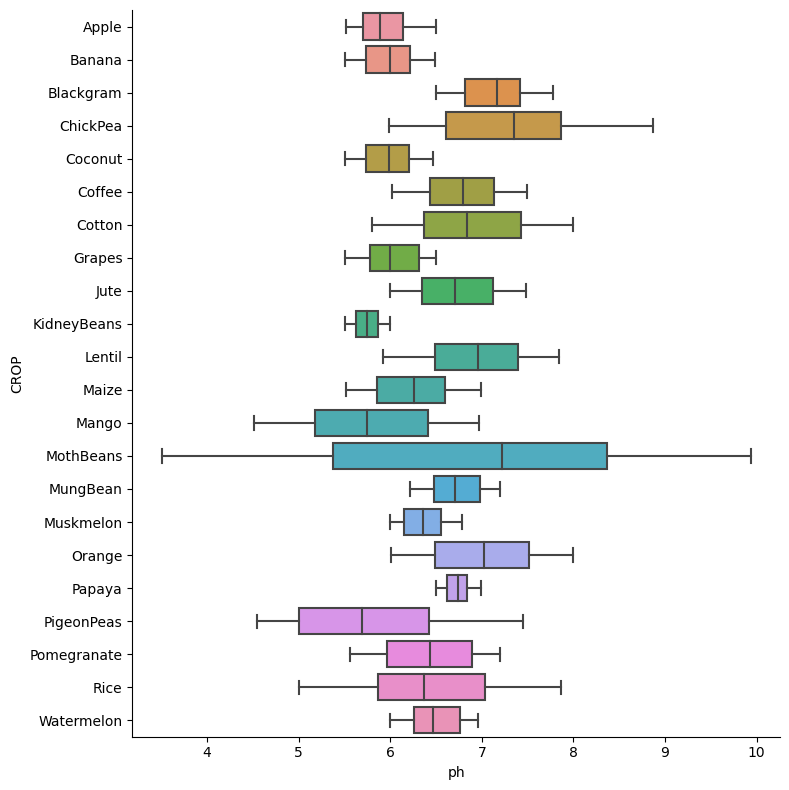

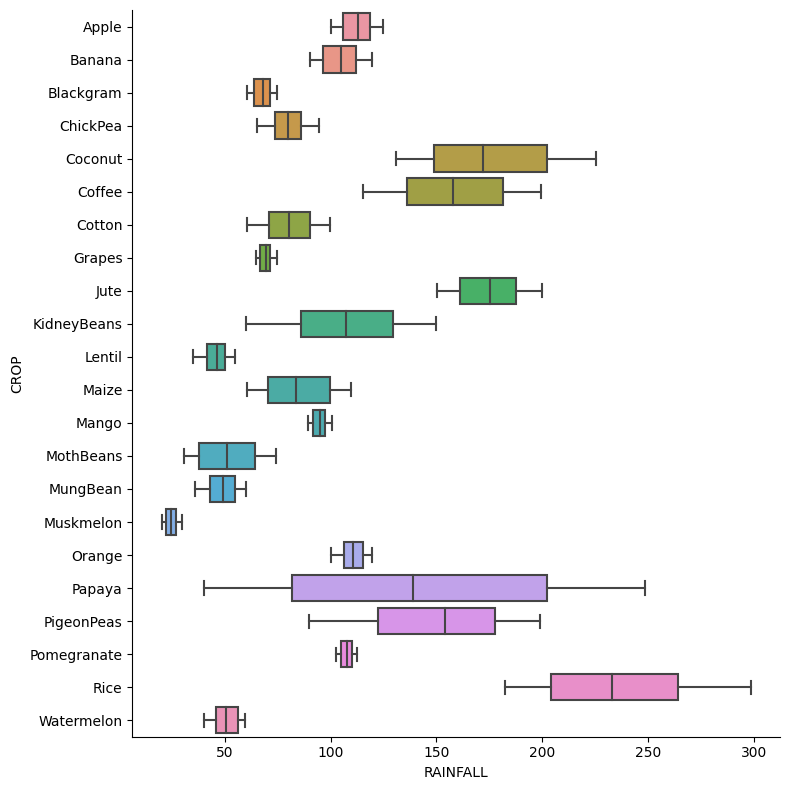

In [15]:

# axes=plt.subplots(1,8)
sns.catplot(data=df2,kind='box', x='CROP_PRICE', y='CROP',height=8 )
sns.catplot(data=df2,kind='box', x='N_SOIL', y='CROP',height=8 )
sns.catplot(data=df2,kind='box', x='P_SOIL', y='CROP',height=8 )
sns.catplot(data=df2,kind='box', x='K_SOIL', y='CROP',height=8 )
sns.catplot(data=df2,kind='box', x='TEMPERATURE', y='CROP',height=8 )
sns.catplot(data=df2,kind='box', x='HUMIDITY', y='CROP',height=8 )
sns.catplot(data=df2,kind='box', x='ph', y='CROP',height=8 )
sns.catplot(data=df2,kind='box', x='RAINFALL', y='CROP',height=8 )

# ax.axvline(25, color=".3", dashes=(2, 2))

After checking all the fields for different classes, outliers were only spotted on in the field 'CROP_PRICE'. So, it is necessary to remove them to avoid skewing of the results.

In [16]:
df2.shape

(2200, 10)

In [17]:
labels=df2['CROP'].unique()
for i in labels:
    df3=df2[df2['CROP']==i]
    q1=df3['CROP_PRICE'].quantile(0.25)
    q3=df3['CROP_PRICE'].quantile(0.75)
    iqr=q3-q1
    outliers=df3[(df2['CROP_PRICE']<( q1-1.5*iqr))|(df2['CROP_PRICE']>( q3+1.5*iqr))]
    df2.drop(outliers.index, inplace=True)
    avg=df2[(df2['CROP']==i)]['CROP_PRICE'].mean()   #we want to take the mean after removing the outliers, otherwise the mean would also be affected.
    outliers['CROP_PRICE']=avg
    df2=df2.append(outliers, ignore_index=True )
    


C:\Users\sriva\AppData\Local\Temp\ipykernel_17064\2745187652.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers=df3[(df2['CROP_PRICE']<( q1-1.5*iqr))|(df2['CROP_PRICE']>( q3+1.5*iqr))]
C:\Users\sriva\AppData\Local\Temp\ipykernel_17064\2745187652.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['CROP_PRICE']=avg
C:\Users\sriva\AppData\Local\Temp\ipykernel_17064\2745187652.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2=df2.append(outliers, ignore_index=True )


In [18]:
df2.shape

(2200, 10)

<h3>After removing outliers</h3>

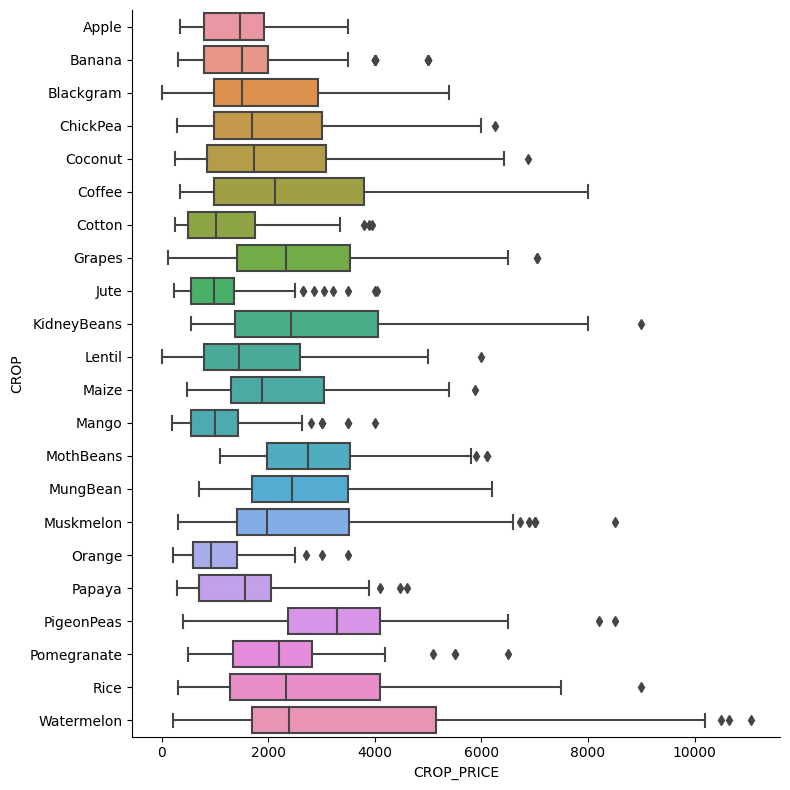

In [19]:
sns.catplot(data=df2,kind='box', x='CROP_PRICE', y='CROP',height=8 )

In [ ]:
df2.to_csv('Updated_data.csv')